In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
from scipy.stats import norm, skew
import numpy as np
import seaborn as sns

import keras
import os, shutil

C:\Users\Laurens\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Recurrent Neural Networks

In [ ]:
#numpy toy sample - this is fake code to show the logic
state_t = 0 #state at first sequence t
for input_t in input_sequence:
    output_t = f(input_t, state_t)
    state_t = output_t

### Keras Implementation of SimpleRNN

In [2]:
from keras.layers import SimpleRNN, Embedding
from keras.models import Sequential

#to just return the output_features
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [5]:
#return timesteps and sequences
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences = True))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [6]:
#Sometimes its good to stack multiple RNN layers to incraese
#representational power of the network. For this you need to
#return all sequences for the layers except the last
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences = True))
model.add(SimpleRNN(32, return_sequences = True))
model.add(SimpleRNN(32, return_sequences = True))
model.add(SimpleRNN(32, return_sequences = False))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


## Simple RNN on IMDB set

In [3]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

print('Loading data..')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words = max_features)
print(len(input_train), 'train_sequences')
print(len(input_test), 'test_sequences')

print('pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen = maxlen)
input_test = sequence.pad_sequences(input_test, maxlen = maxlen)
print('input_train shape', input_train.shape)
print('input_test shape', input_test.shape)

Loading data..
25000 train_sequences
25000 test_sequences
pad sequences (samples x time)
input_train shape (25000, 500)
input_test shape (25000, 500)


In [7]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop', loss='binary_crossentropy', 
             metrics = ['acc'])

history = model.fit(input_train, y_train,
                   epochs = 10, 
                   batch_size = 128, validation_split = 0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 22s 1ms/step - loss: 0.5924 - acc: 0.6676 - val_loss: 0.6689 - val_acc: 0.6830
Epoch 2/10
20000/20000 [==============================] - 22s 1ms/step - loss: 0.3772 - acc: 0.8392 - val_loss: 0.4713 - val_acc: 0.8020
Epoch 3/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.2842 - acc: 0.8880 - val_loss: 0.4252 - val_acc: 0.8180
Epoch 4/10
20000/20000 [==============================] - 21s 1ms/step - loss: 0.2312 - acc: 0.9120 - val_loss: 0.3575 - val_acc: 0.8442
Epoch 5/10
20000/20000 [==============================] - 20s 1ms/step - loss: 0.1825 - acc: 0.9331 - val_loss: 0.3913 - val_acc: 0.8294
Epoch 6/10
20000/20000 [==============================] - 21s 1ms/step - loss: 0.1367 - acc: 0.9532 - val_loss: 0.4725 - val_acc: 0.8558
Epoch 7/10
20000/20000 [==============================] - 21s 1ms/step - loss: 0.1028 - acc: 0.9653 - val_loss: 0.6831 - val_acc:

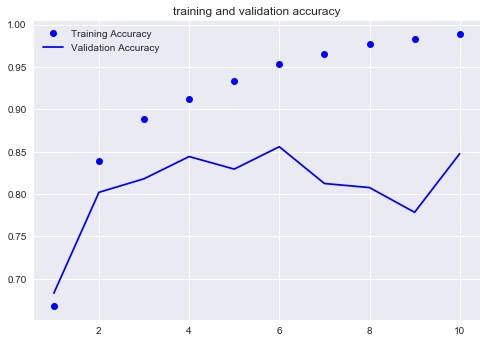

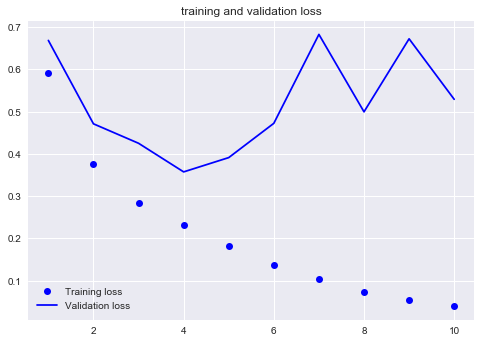

In [8]:
history_dict = history.history
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title("training and validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title("training and validation loss")
plt.legend()

# Advanced RNN -- LSTM and GRU

Single layer LSTM without dropout first.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 65s 3ms/step - loss: 0.5305 - acc: 0.7469 - val_loss: 0.3933 - val_acc: 0.8364
Epoch 2/10
20000/20000 [==============================] - 57s 3ms/step - loss: 0.3036 - acc: 0.8816 - val_loss: 0.3092 - val_acc: 0.8704
Epoch 3/10
20000/20000 [==============================] - 58s 3ms/step - loss

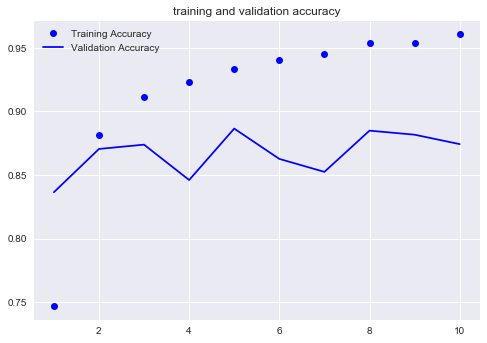

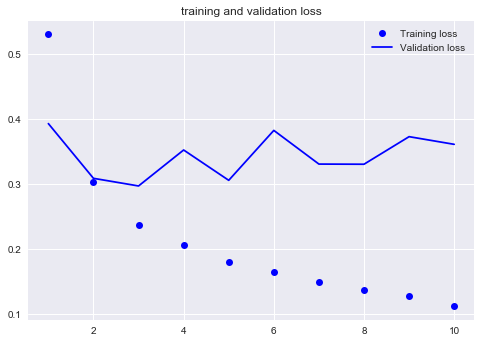

In [6]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['acc'])

history = model.fit(input_train, y_train, epochs = 10,
                   batch_size = 128, validation_split = 0.2)

history_dict = history.history
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title("training and validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title("training and validation loss")
plt.legend()

Simple LSTM with dropout next

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 80s 4ms/step - loss: 0.5472 - acc: 0.7331 - val_loss: 0.3781 - val_acc: 0.8356
Epoch 2/10
20000/20000 [==============================] - 85s 4ms/step - loss: 0.3782 - acc: 0.8440 - val_loss: 0.3824 - val_acc: 0.8422
Epoch 3/10
20000/20000 [==============================] - 83s 4ms/step - loss

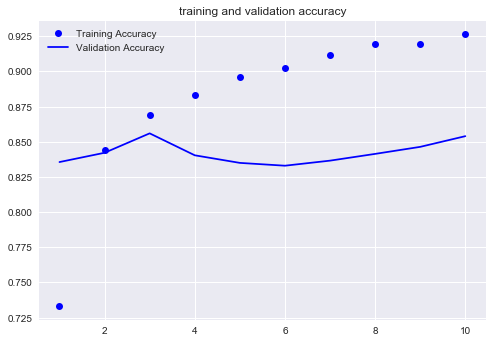

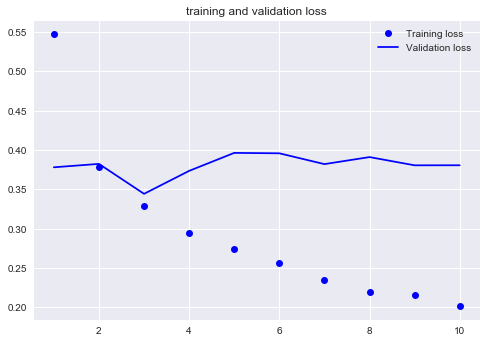

In [5]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32, dropout = 0.2, recurrent_dropout = 0.2))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['acc'])

history = model.fit(input_train, y_train, epochs = 10,
                   batch_size = 128, validation_split = 0.2)

history_dict = history.history
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title("training and validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title("training and validation loss")
plt.legend()

Let's compare with a simple GRU

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
gru_1 (GRU)                  (None, 32)                6240      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 326,273
Trainable params: 326,273
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 55s 3ms/step - loss: 0.5030 - acc: 0.7426 - val_loss: 0.3350 - val_acc: 0.8588
Epoch 2/10
20000/20000 [==============================] - 50s 3ms/step - loss: 0.2960 - acc: 0.8797 - val_loss: 0.3342 - val_acc: 0.8582
Epoch 3/10
20000/20000 [==============================] - 49s 2ms/step - loss

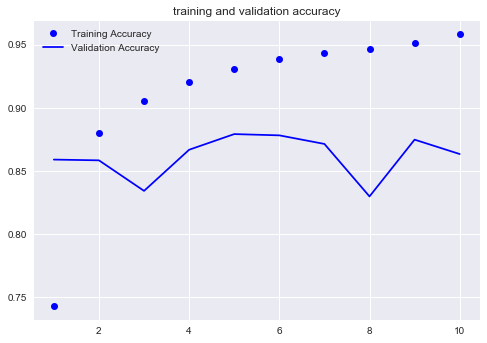

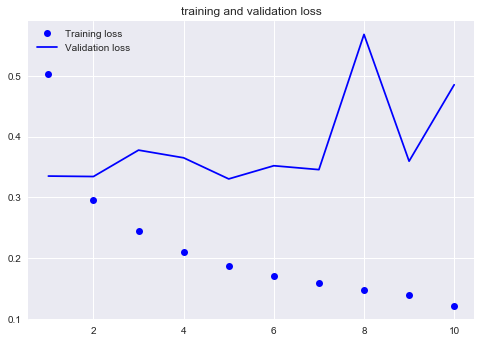

In [10]:
from keras.layers import LSTM, GRU

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(GRU(32))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['acc'])

history = model.fit(input_train, y_train, epochs = 10,
                   batch_size = 128, validation_split = 0.2)

history_dict = history.history
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title("training and validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title("training and validation loss")
plt.legend()

## Time-series with RNNs

In [13]:
import os

data_dir = '/Users/Laurens/Downloads/jena_climate'
fname = os.path.join(data_dir, 'jena_climate_2009_2016.csv')

f = open(fname)
data = f.read()
f.close()

lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:]

print(header)
print(len(lines))

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420551


In [14]:
float_data = np.zeros((len(lines), len(header) -1 ))
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(',')[1:]]
    float_data[i,:] = values

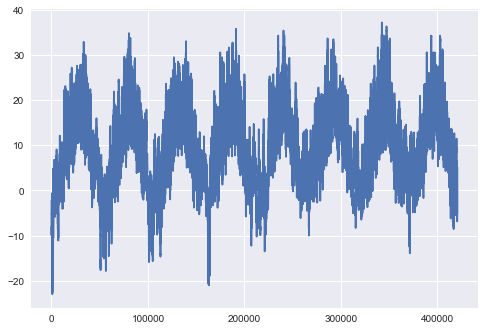

In [15]:
temp = float_data[:,1] 
plt.plot(range(len(temp)), temp)

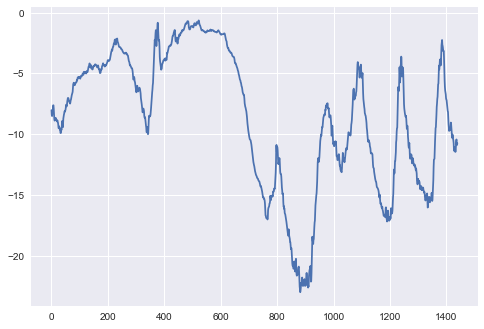

In [16]:
plt.plot(range(1440), temp[:1440])

The "last 10 days" plot shows daily periodicity. Especially in the last 4 days. Its also clear this is from a very cold winter month.

In [17]:
#first we have to normalize the data
#we only do this on the frist 200,000 timesteps which is going to be
#our training data
mean = float_data[:200000].mean(axis=0)
float_data -= mean
std = float_data[:200000].std(axis=0)
float_data /= std

In [18]:
#now we have to setup a generator to get batches of data from the recent 
#past along with a 'target' temp in the future

def generator(data, lookback, delay, min_index, max_index,
             shuffle=False, batch_size = 128, step = 6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(min_index + lookback, 
                                    max_index, size = batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            
            #generates evenly spaced values within range
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)
        
        samples = np.zeros((len(rows), lookback // step,
                           data.shape[-1]))
        
        targets = np.zeros((len(rows)))
        
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        
        yield samples, targets

In [19]:
lookback = 1440
step = 6
delay = 144
batch_size = 128

train_gen = generator(float_data,
                     lookback=lookback,
                     delay=delay,
                     min_index = 0,
                     max_index = 200000,
                     shuffle = True,
                     step = step,
                     batch_size = batch_size)

val_gen = generator(float_data,
                     lookback=lookback,
                     delay=delay,
                     min_index = 200001,
                     max_index = 300000,
                     step = step,
                     batch_size = batch_size)

test_gen = generator(float_data,
                     lookback=lookback,
                     delay=delay,
                     min_index = 300001,
                     max_index = None,
                     shuffle = True,
                     step = step,
                     batch_size = batch_size)

#how many steps do we need to get from val_gen to see the whole val set
val_steps = ((300000 - 200001) / lookback)
#same for test
test_steps = (len(float_data) - 300001 - lookback)

Let's set a baseline to make sure that it's even worth it to use RNN blackbox methods. We do this by assuming that the temperature is the same 24hours from now as it is now.

The above cell takes a while to run. Retunrs ~0.29 MAE

Next to a simple baseline its also worth it do throw a simple neural network at it (feed forward) before doing more complex methods to see if that is even worth it.

In [28]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Flatten(input_shape = (lookback // step, float_data.shape[-1])))
model.add(layers.Dense(32, activation = 'relu'))
model.add(layers.Dense(1)) #no activation cause regression problem!

model.compile(optimizer = RMSprop(), loss = 'mae')
history = model.fit_generator(train_gen,
                             steps_per_epoch = 500,
                             epochs = 20,
                             validation_data= val_gen,
                             validation_steps = val_steps)


Epoch 1/20
500/500 [==============================] - 10s 20ms/step - loss: 1.2434 - val_loss: 0.5132
Epoch 2/20
500/500 [==============================] - 9s 17ms/step - loss: 0.4185 - val_loss: 0.4105
Epoch 3/20
500/500 [==============================] - 11s 22ms/step - loss: 0.2915 - val_loss: 0.2578
Epoch 4/20
500/500 [==============================] - 11s 23ms/step - loss: 0.2645 - val_loss: 0.3376
Epoch 5/20
500/500 [==============================] - 11s 22ms/step - loss: 0.2489 - val_loss: 0.3520
Epoch 6/20
500/500 [==============================] - 12s 23ms/step - loss: 0.2396 - val_loss: 0.3164
Epoch 7/20
500/500 [==============================] - 13s 26ms/step - loss: 0.2341 - val_loss: 0.3748
Epoch 8/20
500/500 [==============================] - 11s 22ms/step - loss: 0.2284 - val_loss: 0.2676
Epoch 9/20
500/500 [==============================] - 10s 20ms/step - loss: 0.2224 - val_loss: 0.3181
Epoch 10/20
500/500 [==============================] - 10s 19ms/step - loss: 0.2189

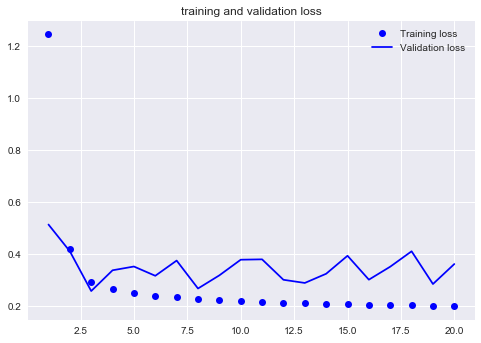

In [29]:
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title("training and validation loss")
plt.legend()

Good we did baseline. Just common sense is hard to outperform. (MAE 0.29 vs best of MAE 0.26 in NN)

Now let's try a RNN. I'll use GRU (Gated Recurrent Neural Network) which is a streamlined version of LSTM. Slightly less representation for faster speed.

In [46]:
model = Sequential()
model.add(layers.GRU(32, input_shape = (None, float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer = RMSprop(), loss = 'mae')
history = model.fit_generator(train_gen, steps_per_epoch = 500,
                              epochs = 20,
                              validation_data = val_gen,
                              validation_steps = val_steps)

Epoch 1/20
500/500 [==============================] - 86s 172ms/step - loss: 0.3165 - val_loss: 0.2870
Epoch 2/20
500/500 [==============================] - 85s 171ms/step - loss: 0.2861 - val_loss: 0.2361
Epoch 3/20
500/500 [==============================] - 96s 192ms/step - loss: 0.2783 - val_loss: 0.2406
Epoch 4/20
500/500 [==============================] - 85s 171ms/step - loss: 0.2729 - val_loss: 0.2569
Epoch 5/20
500/500 [==============================] - 85s 169ms/step - loss: 0.2691 - val_loss: 0.2854
Epoch 6/20
500/500 [==============================] - 85s 170ms/step - loss: 0.2640 - val_loss: 0.2550
Epoch 7/20
500/500 [==============================] - 84s 167ms/step - loss: 0.2580 - val_loss: 0.3024
Epoch 8/20
500/500 [==============================] - 86s 173ms/step - loss: 0.2530 - val_loss: 0.3118
Epoch 9/20
500/500 [==============================] - 85s 169ms/step - loss: 0.2499 - val_loss: 0.2530
Epoch 10/20
500/500 [==============================] - 86s 172ms/step - l

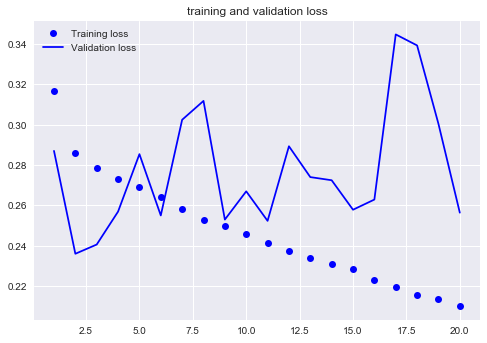

In [47]:
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title("training and validation loss")
plt.legend()

Now let's try LSTM

In [17]:
model = Sequential()
model.add(layers.LSTM(32, input_shape = (None, float_data.shape[-1])))
model.add(layers.Dense(1))
model.summary()

model.compile(optimizer = RMSprop(), loss = 'mae')
history = model.fit_generator(train_gen, steps_per_epoch = 500,
                              epochs = 20,
                              validation_data = val_gen,
                              validation_steps = val_steps)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 32)                6016      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 6,049
Trainable params: 6,049
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
500/500 [==============================] - 68s 136ms/step - loss: 0.2976 - val_loss: 0.2856
Epoch 2/20
500/500 [==============================] - 67s 135ms/step - loss: 0.2736 - val_loss: 0.2292
Epoch 3/20
500/500 [==============================] - 68s 137ms/step - loss: 0.2619 - val_loss: 0.2686
Epoch 4/20
500/500 [==============================] - 72s 143ms/step - loss: 0.2535 - val_loss: 0.2796
Epoch 5/20
500/500 [==============================] - 71s 142ms/step - loss: 0.2453 - val_loss: 0.2509
Epoch 6/20
500/500 [=

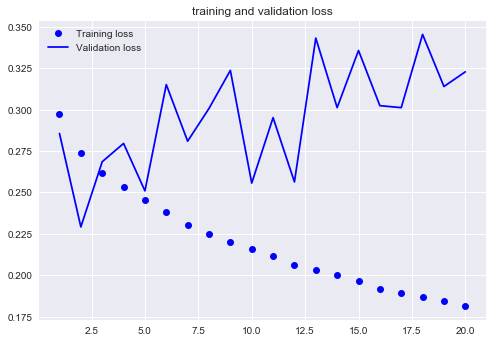

In [18]:
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title("training and validation loss")
plt.legend()

Lets try deeper networks

In [20]:
model = Sequential()
model.add(layers.LSTM(32, return_sequences = True,
                      input_shape = (None, float_data.shape[-1])))
model.add(layers.LSTM(32))
model.add(layers.Dense(1))
model.summary()

model.compile(optimizer = RMSprop(), loss = 'mae')
history = model.fit_generator(train_gen, steps_per_epoch = 500,
                              epochs = 20,
                              validation_data = val_gen,
                              validation_steps = val_steps)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, None, 32)          6016      
_________________________________________________________________
lstm_5 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 14,369
Trainable params: 14,369
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
500/500 [==============================] - 156s 313ms/step - loss: 0.3111 - val_loss: 0.2205
Epoch 2/20
500/500 [==============================] - 161s 323ms/step - loss: 0.2754 - val_loss: 0.2937
Epoch 3/20
500/500 [==============================] - 162s 325ms/step - loss: 0.2616 - val_loss: 0.2558
Epoch 4/20
500/500 [==============================] - 157s 313ms/step - loss: 0.2490 - val

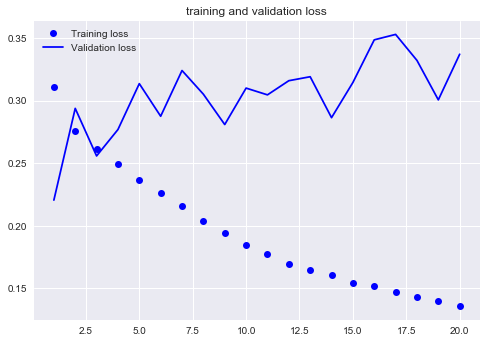

In [21]:
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title("training and validation loss")
plt.legend()

Slightly better performance but overfitting happens very fast. Let's add dropout to the LSTM layers

In [22]:
model = Sequential()
model.add(LSTM(32, return_sequences = True,
                      input_shape = (None, float_data.shape[-1]), dropout = 0.2, recurrent_dropout = 0.2))
model.add(LSTM(32, dropout = 0.2, recurrent_dropout = 0.2))
model.add(Dense(1))
model.summary()

model.compile(optimizer = 'RMSprop', loss = 'mae')
history = model.fit_generator(train_gen, steps_per_epoch = 500,
                              epochs = 20,
                              validation_data = val_gen,
                              validation_steps = val_steps)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, None, 32)          6016      
_________________________________________________________________
lstm_7 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 14,369
Trainable params: 14,369
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
500/500 [==============================] - 191s 381ms/step - loss: 0.3554 - val_loss: 0.2866
Epoch 2/20
500/500 [==============================] - 192s 383ms/step - loss: 0.3173 - val_loss: 0.2490
Epoch 3/20
500/500 [==============================] - 187s 374ms/step - loss: 0.3068 - val_loss: 0.2926
Epoch 4/20
500/500 [==============================] - 191s 382ms/step - loss: 0.3030 - val

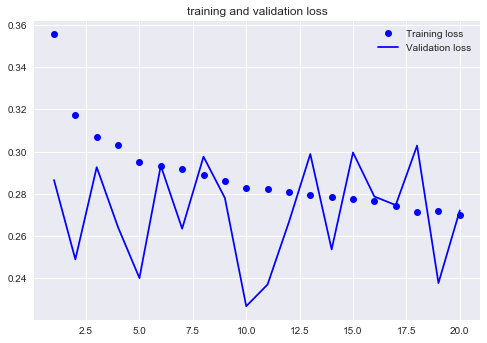

In [23]:
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title("training and validation loss")
plt.legend()

Dropout might be too harsh. Or need more epochs.